In [1]:
import pandas as pd
import re
import string
import unidecode
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.util import ngrams

import matplotlib.pyplot as plt

%matplotlib inline

with open('Ana.txt',encoding="UTF-8") as f:
    article_text = f.read().replace("\n"," ")

Entramos en el link y la sesion que queramos (pulsar en el boton señalado para obtener la sesión) la copiamos y la pegamos en un bloc de notas llamado "Ana.txt"

https://www.congreso.es/busqueda-de-intervenciones

![title](Captura.PNG)


In [2]:
def limpia_cadena(cadena):
    
    cadena = stopwords_rem(cadena)
    cadena = limpia(cadena)
    
    return cadena

def palabras_repetidas(df,nombre,columna,comparar = False, grams = 1,ordenar_por = "Cuenta"):
    #df['temp_list'] = df[columna].apply(lambda x:str(stopwords_rem(x)).split())
    
    df_palabras_totales = palabras_tot(n_gram = grams)
    
    cadena = ""
    for i,row in df.iterrows(): cadena +=row.Discurso # Se juntan todos los discursos    
    
    cadena = limpia_cadena(cadena)
    
    cadena = [x for x in cadena.split() if len(x)>3]#Elimino palabras de 3 o menos letras

    
    l=[]
    top = Counter(Counter(ngrams(cadena, grams)))
    
    temp = pd.DataFrame(top.most_common(30))
    t2=pd.DataFrame(top.most_common(400000))
    t2.columns = ['Palabras ','Cuenta']
    total=t2.sum()[1]
    t2["Porcentaje"]=round(t2["Cuenta"]/total*100,4)
    temp.columns = ['Palabras ','Cuenta']
    temp["Porcentaje"]=round(t2["Cuenta"]/total*100,4)
    
    if comparar == True:
        
        
        for i,row in temp.iterrows():
            
            temp.at[i,"Total Palabra"] = df_palabras_totales[df_palabras_totales["index"] == temp.at[i,"Palabras "]].iloc[0][1]
        
        temp["% Palabra"] = temp["Cuenta"] / temp["Total Palabra"]
        
        temp["Total Palabra"] = temp["Total Palabra"].astype(int)
        
    return temp.sort_values(ordenar_por,ascending= False).style.background_gradient(cmap='Blues'),t2

def stopwords_rem(text):
    final_x=""
    text=limpia(text)
    #text=" ".join(tokenize(text))
    for i in text.split():
        if i not in stopwords_es:
            final_x+=i+" "
    return final_x
     
def limpia(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = re.sub("[\(\[].*?[\)\]]", "", text)#Elimino texto entre brackets

    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = unidecode.unidecode(text)
    
    

    return text

stopwords_es=stopwords.words("spanish")
stopwords_es.append("par")


In [3]:
def discurso(cont):
    discurso = ""
    cont_func = cont
    
    for speech in palabras[cont:]:
        
        if "señor" in speech and palabras[cont_func+1].isupper():#Si encuentra nombre para el bucle
                    
            break

            
        discurso += speech + " "
        cont_func += 1
        
        
        
    return discurso

In [4]:
cont = 0
palabras = article_text.split()
lista = []#Creara el dataframe despues
disc = 1 #Estrablece el orden de los discursos
for i in palabras:
    nombre = ""
    int_cont = 1

    if "señor" in i and palabras[cont+1].isupper():#Check if name
        
        for subloop in palabras[cont+1:]:#Sacamos el nombre
            
            if subloop.isupper() == False:
                
                lista.append([nombre,discurso(int_cont+cont),disc])
                disc +=1
                
                break
            nombre += subloop + " " #Añadimos el nombre del interventor
        
        
            int_cont += 1   
        
        
   
        
    cont += 1

In [5]:
data = pd.DataFrame(lista,columns = ["Interventor","Discurso","Orden"])
data #Todos los datos, se pueden exportar a excel
#data.to_csv("Data.csv")

,Interventor,Discurso,Orden
0,PRESIDENTA:,"Buenos días, señorías. Se reanuda la sesión. S...",1
1,SÁNCHEZ PÉREZ-CASTEJÓN,(candidato a la Presidencia del Gobierno): Gra...,2
2,PRESIDENTA:,"Señorías, por favor. (Rumores). Ruego silencio...",3
3,SÁNCHEZ PÉREZ-CASTEJÓN,(candidato a la Presidencia del Gobierno): Han...,4
4,PRESIDENTA:,Ruego silencio. (El señor García Egea pronunci...,5
...,...,...,...
88,PRESIDENTA:,"Gracias, señor García. En último lugar, por el...",89
89,MARTÍNEZ OBLANCA:,"Señora presidenta, señorías, señor candidato, ...",90
90,PRESIDENTA:,"Gracias, señor Martínez Oblanca. Por el Grupo ...",91
91,LASTRA FERNÁNDEZ:,"Presidenta, señorías, el pasado domingo comenz...",92


# % Repeticion de palabras

Las palabras mas repetidas en general

In [6]:
def palabras_tot(n_gram = 1):
    cadena = ""
    for i,row in data.iterrows(): cadena +=row.Discurso # Se juntan todos los discursos
        
    cadena = limpia_cadena(cadena)

    #creating a dictionary that shows occurances of n-grams in text
    n_gram_dic = dict(Counter(ngrams(cadena.split(), n_gram)))
    df_palabras_totales = pd.DataFrame.from_dict(n_gram_dic,orient='index',columns = ["Cuenta"]).sort_values("Cuenta",ascending = False).reset_index()
    return df_palabras_totales

In [7]:
palabras_tot()

,index,Cuenta
0,"(senor,)",94
1,"(gobierno,)",88
2,"(espana,)",67
3,"(mas,)",66
4,"(senorias,)",59
...,...,...
2847,"(declarar,)",1
2848,"(llamarles,)",1
2849,"(bolivia,)",1
2850,"(teocracias,)",1


# Analisis 

In [8]:
data.Interventor.unique()

array(['PRESIDENTA: ', 'SÁNCHEZ PÉREZ-CASTEJÓN ', 'CASADO BLANCO: ',
       'ABASCAL CONDE: ', 'IGLESIAS TURRIÓN: ', 'BORRÀS CASTANYER: ',
       'ERREJÓN GALVÁN: ', 'BALDOVÍ RODA: ', 'ORAMAS GONZÁLEZ-MORO: ',
       'QUEVEDO ITURBE: ', 'REGO CANDAMIL: ', 'MAZÓN RAMOS: ',
       'GUITARTE GIMENO: ', 'BASSA COLL: ', 'ARRIMADAS GARCÍA: ',
       'ESTEBAN BRAVO: ', 'MATUTE GARCÍA DE JALÓN: ', 'VEHÍ CANTENYS: ',
       'GARCÍA ADANERO: ', 'MARTÍNEZ OBLANCA: ', 'LASTRA FERNÁNDEZ: '],
      dtype=object)

Palabras mas repetidas por el interventor seleccionado

Como vemos en la imagen la palabra que mas repite Sánchez en la sesion es Señorias, en global la palabra se ha pronunciado 59 veces, por tanto el 38% de las veces que se ha pronunciado ha sido por parte de Pedrito.

De igual forma la palabra bloqueo se pronunció 9 veces de las cuales 7 fueron de Sánchez.

De esta manera podemos ver que temas enfatizaron mas cada uno de los interventores. Con esta funcion de palabras repetidas se pueden analizar bastante bien los datos, cambiando parametros, ordenando por distintas columnas, etc

In [9]:
display(palabras_repetidas(data[data.Interventor.str.contains("SÁNCHEZ PÉREZ-CASTEJÓN")],"g","Discurso",comparar=True,
                          ordenar_por = "Cuenta", grams = 1)[0])

,Palabras,Cuenta,Porcentaje,Total Palabra,% Palabra
0,"('senorias',)",23,2.277200,59,0.389831
1,"('gobierno',)",17,1.683200,88,0.193182
2,"('tambien',)",13,1.287100,43,0.302326
3,"('pais',)",10,0.990100,30,0.333333
4,"('espana',)",9,0.891100,67,0.134328
5,"('coalicion',)",9,0.891100,12,0.750000
6,"('elecciones',)",8,0.792100,17,0.470588
7,"('derechos',)",8,0.792100,22,0.363636
8,"('bloqueo',)",7,0.693100,9,0.777778
9,"('espanoles',)",7,0.693100,36,0.194444


Aqui podemos ver lo anterior para cada uno de los interventores

In [10]:
#for i in data.Interventor.unique(): 
#    print(i)
#    display(palabras_repetidas(data[data.Interventor.str.contains(i)],"g","Discurso",comparar=True, ordenar_por = "Cuenta", grams = 1)[0]) 

# Sentimiento

Se ha utilizado el analizador de sentimiento que viene con la libreria NLTK, se deberia utilizar alguno como BERT o RoBERTa para un mejor resultado

In [11]:
def analizador(text):
    b =limpia(text) #
    #b = str(TextBlob(text).translate(to="en"))
    sid=SentimentIntensityAnalyzer()
    return sid.polarity_scores(b),b


In [12]:
data["Sent"]=""
for i,row in data.iterrows():
    
    if i>-1: 
        #print(i)
        #try:
            data.at[i,"Sent"]=analizador(row["Discurso"])[0]["compound"]
            data.at[i,"Aplauso"]=row["Discurso"].count("plauso")
            
            #sleep(1)
        #except: print("Error")

In [13]:
data = data[~(data.Interventor=="PRESIDENTA: ")]


In [14]:
#Eliminamos intervenciones residuales de menos de 200 palabras
data = data[data["Discurso"].apply(lambda x: len(x.split(' ')) > 200)] #https://stackoverflow.com/questions/42895061/how-to-remove-a-row-from-pandas-dataframe-based-on-the-length-of-the-column-valu

Aqui vemos cual es el discurso mas aplaudido

In [15]:
data.sort_values("Aplauso",ascending=False)

,Interventor,Discurso,Orden,Sent,Aplauso
91,LASTRA FERNÁNDEZ:,"Presidenta, señorías, el pasado domingo comenz...",92,-0.875,13.0
23,IGLESIAS TURRIÓN:,"Muchas gracias, señora presidenta. Muchas grac...",24,-0.9468,12.0
19,ABASCAL CONDE:,"Gracias, señora presidenta. Teniendo en cuenta...",20,-0.9252,9.0
11,CASADO BLANCO:,"Gracias, señora presidenta. Quiero comenzar mi...",12,-0.9875,9.0
7,SÁNCHEZ PÉREZ-CASTEJÓN,(candidato a la Presidencia del Gobierno): El ...,8,-0.9788,6.0
75,MATUTE GARCÍA DE JALÓN:,"Presidenta, integrantes de la Mesa, también de...",76,-0.9638,5.0
1,SÁNCHEZ PÉREZ-CASTEJÓN,(candidato a la Presidencia del Gobierno): Gra...,2,-0.9922,5.0
87,GARCÍA ADANERO:,"Muchas gracias, señora presidenta. Señor Sánch...",88,-0.977,4.0
31,BALDOVÍ RODA:,"Señor Abascal, perdone que insista, a la vista...",32,-0.7805,4.0
21,ABASCAL CONDE:,"Concluyo inmediatamente, presidenta. Vimos aye...",22,-0.9286,3.0


Las personas que mas aplausos han recibido

In [16]:
data.groupby("Interventor").sum().sort_values("Aplauso",ascending = False).drop("Orden",axis = 1)

,Aplauso
Interventor,
SÁNCHEZ PÉREZ-CASTEJÓN,14.0
LASTRA FERNÁNDEZ:,13.0
CASADO BLANCO:,12.0
IGLESIAS TURRIÓN:,12.0
ABASCAL CONDE:,12.0
MATUTE GARCÍA DE JALÓN:,6.0
ARRIMADAS GARCÍA:,5.0
BALDOVÍ RODA:,4.0
GARCÍA ADANERO:,4.0


Discursos ordenados por sentimiento, un Sent cercano a 1 es un mensaje positivo y cercano a -1 negativo. La libreria utilizada para el analisis del sentimiento detecta cierta negatividad en el congreso...

In [17]:
data.sort_values("Sent",ascending=False)

,Interventor,Discurso,Orden,Sent,Aplauso
37,REGO CANDAMIL:,"Gracias, señora presidenta. Galiza deixará de ...",38,0.3182,1.0
45,BASSA COLL:,Buenos días. Antes de nada y de parte de Esque...,46,0.1027,3.0
77,MATUTE GARCÍA DE JALÓN:,Estamos aquí para defender nuestro derecho a c...,78,-0.126,1.0
35,QUEVEDO ITURBE:,"Gracias, señora presidenta. Primera considerac...",36,-0.4215,2.0
79,MATUTE GARCÍA DE JALÓN:,"En 1978 desde esta misma tribuna, Francisco Le...",80,-0.5859,0.0
69,ARRIMADAS GARCÍA:,"... necesita extremismo -acabo, señora preside...",70,-0.6808,0.0
9,SÁNCHEZ PÉREZ-CASTEJÓN,(candidato a la Presidencia del Gobierno): Señ...,10,-0.7003,3.0
31,BALDOVÍ RODA:,"Señor Abascal, perdone que insista, a la vista...",32,-0.7805,4.0
67,ARRIMADAS GARCÍA:,Ustedes han presionado a quienes han querido p...,68,-0.8205,2.0
63,ARRIMADAS GARCÍA:,"Gracias, señora presidenta. En primer lugar qu...",64,-0.8706,3.0


In [18]:
data.to_excel("Congreso.xlsx")

# Ver quien ha pronunciado mas ciertas palabras

In [19]:
def agrupa_palabras(palabra):
    dicc = {}
    for interventor in data.Interventor.unique():
        df = data[data.Interventor == interventor]

        cadena = ""
        for i,row in df.iterrows(): cadena +=row.Discurso # Se juntan todos los discursos
        
        cadena = limpia_cadena(cadena)
        
        palabra = limpia(palabra)
        
        dicc[interventor] = cadena.count(palabra)
    return dict(sorted(dicc.items(), key=lambda item: item[1], reverse=True))

Aqui observamos quien ha dicho la palabra España mas veces

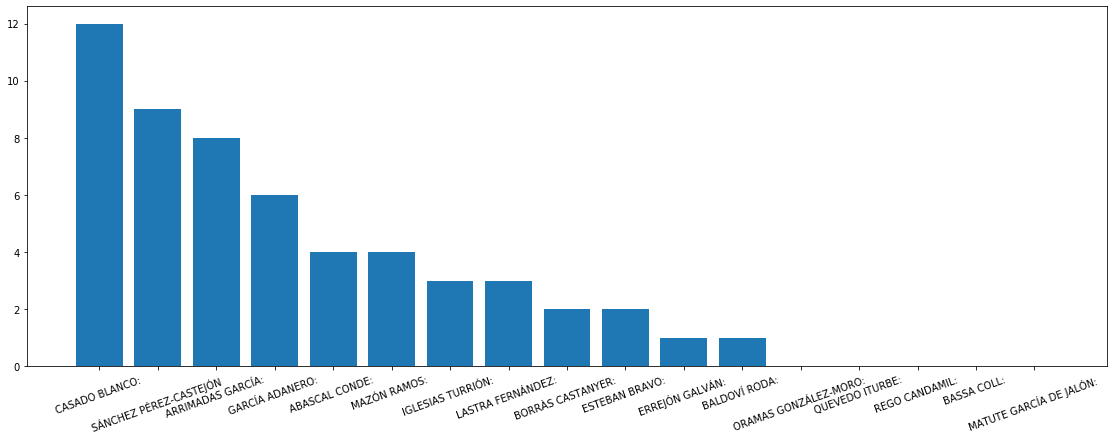

In [20]:

dt = agrupa_palabras("españa")

fig = plt.figure(figsize = (15, 5), facecolor = None) 

ax = fig.add_axes([0,0,1,1])

plt.xticks(rotation=20)

langs = list(dt.keys())
students = list(dt.values())
ax.bar(langs,students)
plt.show()
